<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW4/par2_of_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [ ]:
#all the imports I needed
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
import numpy as np

from tabulate import tabulate
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


ks test :  a nonparametric test of whether two samples come from the same distribution (or whether one sample matches a reference distribution).

based on the paper: the distribution of earthquake inter-event times above one magnitude threshold is the same as the distribution above another threshold (after proper rescaling)




    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The K–S statistic is the maximum absolute difference between the two cumulative distribution functions (CDFs):
$$d_{kl} \equiv \max_{\forall x} |P_k(x) - P_l(x)|$$
Where:
- $P_k(x)$ is the empirical cumulative distribution function (CDF) for data set $k$.
- $P_l(x)$ is the empirical CDF for data set $l$.
- $d_{kl}$ is the maximum absolute vertical distance between the two CDFs.




    3 What does the probability distribution of this statistic depend on?
    
   


K-S is  a distribution-free test. So  its probability distribution of  depends only on the sample sizes of the two datasets being compared, provided the null hypothesis is true. It depends only on the sample sizes $n_1$ and $n_2$.
In the papar: the effective sample size $N_e$ for the two-sample Kolmogorov-Smirnov test is calculated as:

$$N_e = \frac{n_1 n_2}{n_1 + n_2}$$

Where:
- $n_1$ is the number of observations in the first sample.
- $n_2$ is the number of observations in the second sample.


    

# PART I:  Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [ ]:
#your code here...

In [ ]:
eqdata= pd.read_csv("https://raw.githubusercontent.com/elhamkashi/DSPS_EKashi/refs/heads/main/HW3/earthquakes.csv", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-957196177.py:1: SyntaxWarning: invalid escape sequence '\s'
  eqdata= pd.read_csv("https://raw.githubusercontent.com/elhamkashi/DSPS_EKashi/refs/heads/main/HW3/earthquakes.csv", sep="\s+")


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [ ]:
#note: the number of columns may be different depending on how you read the data in. The number of ROWs MUST be the same
eqdata.shape #also note: in class we used a different name for the dataframe

(70798, 13)

In [ ]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49


In [ ]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,70798.000000,70798.000000,70798.00000,70798.000000,7.079800e+04,70798.000000,70798.000000
mean,2.417826,33.977749,-116.88145,5.707677,3.699163e+06,30.424376,175.725049
std,0.407683,1.156586,1.07667,3.842620,3.495378e+06,22.374143,226.196774
min,2.000000,30.094830,-121.76000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.061000,-117.69200,3.100000,7.380962e+05,15.000000,59.000000
50%,2.300000,34.056750,-116.59000,5.300000,3.049477e+06,24.000000,111.000000
75%,2.590000,34.591000,-116.25100,6.900000,3.325926e+06,39.000000,211.000000
max,7.100000,37.985500,-113.71900,29.300000,3.736673e+07,406.000000,3815.000000


In [ ]:
eqdata.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'M', 'LAT', 'LON',
       'DEPTH', 'Q', 'EVID', 'NPH', 'NGRM'],
      dtype='object')

now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [ ]:
# your code here...

In [ ]:
eqdata=eqdata[['#YYY/MM/DD', 'HH:mm:SS.ss', 'MAG']]

In [ ]:
eqdata.dtypes

,0
#YYY/MM/DD,object
HH:mm:SS.ss,object
MAG,float64


In [ ]:
mydictionary = {"v1": 0, "v2": 1}


In [ ]:
eqdata.rename({'#YYY/MM/DD' : 'date', 'HH:mm:SS.ss' : "time", 'MAG' : "mag"}, axis = 1, inplace = True) # This makes a dictionary
#earthquakes.head(10)
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


In [ ]:
pd.to_datetime("9/11/2003" + " " + "9:00:00")

Timestamp('2003-09-11 09:00:00')

In [ ]:
eqdata['newdate'] = eqdata["date"].map(pd.to_datetime)
#takes each date string from the 'date' column,
#then converts it into a proper datetime object

In [ ]:
eqdata['datetime'] = eqdata["date"] + " " + eqdata["time"]
eqdata['datetime']

,datetime
0,1984/01/01 01:30:57.52
1,1984/01/01 05:31:34.16
2,1984/01/01 06:59:05.14
3,1984/01/01 11:10:25.29
4,1984/01/01 19:38:19.79
...,...
70793,2002/12/29 19:37:24.56
70794,2002/12/29 20:17:33.40
70795,2002/12/29 20:21:28.73
70796,2002/12/30 21:51:52.55


In [ ]:
eqdata.head()

,date,time,mag,newdate,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79


In [ ]:
eqdata.describe()

,mag,newdate
count,70798.000000,70798
mean,2.417826,1992-11-07 16:14:28.092318976
min,2.000000,1984-01-01 00:00:00
25%,2.120000,1988-05-05 00:00:00
50%,2.300000,1992-07-18 00:00:00
75%,2.590000,1996-10-29 00:00:00
max,7.100000,2002-12-30 00:00:00
std,0.407683,NaN


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [ ]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [ ]:
#find the invalid 5 entries
invalid_rows = []
for index, row in eqdata.iterrows():
    try:
        pd.to_datetime(row['datetime'])
    except ValueError:
        invalid_rows.append(index)

print("Rows with invalid datetime entries:")
display(eqdata.loc[invalid_rows])

Rows with invalid datetime entries:


,date,time,mag,newdate,datetime


In [ ]:
#convert invalid dates to NaT (Not a Time)
eqdata['newdatetime'] = eqdata['datetime'].map(lambda x: pd.to_datetime (x, errors= 'coerce'))
#eqdata['newdatetime'] = pd.to_datetime(eqdata['datetime'], errors= 'coerce')  errors='coerce' converts invalid dates to NaT (Not a Time)

In [ ]:
#converts invalid dates to a Time
for i in eqdata.index:
  if (eqdata.loc[i, "time"].endswith("60.00")):
    print(eqdata.loc[i, "time"])
    eqdata.loc[i, "time"] = eqdata.loc[i, "time"][:6] + "59.99"
    print(eqdata.loc[i, "time"])

In [ ]:
# Find rows with NaT
nat_mask = eqdata['datetime'].isna()
print(f"Number of invalid datetime entries: {nat_mask.sum()}")

# Example fix: if time has '60.00' seconds, replace with '59.99'
for idx in eqdata[nat_mask].index:
    if eqdata.loc[idx, 'time'].endswith('60.00'):
        eqdata.loc[idx, 'time'] = eqdata.loc[idx, 'time'][:6] + '59.99'
        # Recompute datetime
        new_str = eqdata.loc[idx, 'date'] + ' ' + eqdata.loc[idx, 'time']
        eqdata.loc[idx, 'datetime'] = pd.to_datetime(new_str, errors='coerce')

Number of invalid datetime entries: 0


In [ ]:
# your code here

In [ ]:
eqdata.head()
#datetime column contains strings for  human-readable format,
#newdatetime column  contains pandas Timestamp objects for operations
#their underlying data type makes all the difference for the subsequent steps in the analysis.

,date,time,mag,newdate,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


## select valuable data
Starting here is stuff we did not do together in class but is part of the homework due on 9/17


Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [ ]:
# your code here

In [ ]:
#this are snippits of code. This is not intended as a script that should run on its own.

# first I create the timetamps pairs for the beginning and end of the valid periods.
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

############
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


############

# data between start and end of first time period
gooddates = (((eqdata.newdatetime >= ss[0][0]) * (eqdata.newdatetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.newdatetime >=ss [1][0]) * (eqdata.newdatetime <= ss[1][1])) +\
        ((eqdata.newdatetime >=ss [2][0]) * (eqdata.newdatetime <= ss[2][1])) +\
        ((eqdata.newdatetime >=ss [3][0]) * (eqdata.newdatetime <= ss[3][1])) +\
        ((eqdata.newdatetime >=ss [4][0]) * (eqdata.newdatetime <= ss[4][1])) +\
        ((eqdata.newdatetime >=ss [5][0]) * (eqdata.newdatetime <= ss[5][1])) +\
        ((eqdata.newdatetime >=ss [6][0]) * (eqdata.newdatetime <= ss[6][1])) +\
        ((eqdata.newdatetime >=ss [7][0]) * (eqdata.newdatetime <= ss[7][1])) +\
        ((eqdata.newdatetime >=ss [8][0]) * (eqdata.newdatetime <= ss[8][1])) +\
        ((eqdata.newdatetime >=ss [9][0]) * (eqdata.newdatetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.newdatetime >=ss [10][0]) * (eqdata.newdatetime <= ss[10][1])\
        ).values)
gooddates

the 11 timestamp pairs that are the boundaries of good data periods are:


,newdatetime
0,True
1,True
2,True
3,True
4,True
...,...
70793,True
70794,True
70795,True
70796,True


In [ ]:
#print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [ ]:
import numpy as np
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [ ]:
# Create a mask for data within any of these periods
gooddates = (((eqdata.newdatetime >= ss[0][0]) & (eqdata.newdatetime <= ss[0][1])) |\
        ((eqdata.newdatetime >=ss [1][0]) & (eqdata.newdatetime <= ss[1][1])) |\
        ((eqdata.newdatetime >=ss [2][0]) & (eqdata.newdatetime <= ss[2][1])) |\
        ((eqdata.newdatetime >=ss [3][0]) & (eqdata.newdatetime <= ss[3][1])) |\
        ((eqdata.newdatetime >=ss [4][0]) & (eqdata.newdatetime <= ss[4][1])) |\
        ((eqdata.newdatetime >=ss [5][0]) & (eqdata.newdatetime <= ss[5][1])) |\
        ((eqdata.newdatetime >=ss [6][0]) & (eqdata.newdatetime <= ss[6][1])) |\
        ((eqdata.newdatetime >=ss [7][0]) & (eqdata.newdatetime <= ss[7][1])) |\
        ((eqdata.newdatetime >=ss [8][0]) & (eqdata.newdatetime <= ss[8][1])) |\
        ((eqdata.newdatetime >=ss [9][0]) & (eqdata.newdatetime <= ss[9][1])) |\
        ((eqdata.newdatetime >=ss [10][0]) & (eqdata.newdatetime <= ss[10][1])\
        ).values)

In [ ]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18852 earthquakes falling in the selected stationary periods


In [ ]:
#create eqGoodData by filtering the original eqdata DataFrame using the gooddates boolean array
eqGoodData = eqdata[gooddates].copy()

In [ ]:
eqGoodData.shape

(18852, 6)

In [ ]:
eqGoodData.head()

,date,time,mag,newdate,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


In [ ]:
#eqGoodData.shape from original code

In [ ]:
#eqGoodData.head()  #from original code

Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [ ]:
# Create a boolean mask for magnitudes greater than 2
#broadcasts the scalar 2 across the entire Series eqGoodData['mag']
#result=magnitude_mask,same shape as eqGoodData['mag'],
# with True where the magnitude is greater than 2 and False otherwise
magnitude_mask = eqGoodData['mag'] > 2

# Apply the mask to filter the DataFrame
#select only the rows from eqGoodData where the corresponding value in magnitude_mask is True.
eqGoodData = eqGoodData[magnitude_mask].copy()

display(eqGoodData.shape)

(18027, 6)

In [ ]:
#eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (as done in class).


In [ ]:
eqGoodData["newdatetime"].diff()

,newdatetime
0,NaT
1,0 days 04:00:36.640000
2,0 days 01:27:30.980000
3,0 days 04:11:20.150000
4,0 days 08:27:54.500000
...,...
70793,0 days 00:00:30.140000
70794,0 days 00:40:08.840000
70795,0 days 00:03:55.330000
70796,1 days 01:30:23.820000


In [ ]:
# Calculate gaps in nanoseconds
eqGoodData['gaps'] = eqGoodData['newdatetime'].diff().view('int64')


/tmp/ipython-input-1668177953.py:2: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  eqGoodData['gaps'] = eqGoodData['newdatetime'].diff().view('int64')


In [ ]:

eqGoodData.head()

,date,time,mag,newdate,datetime,newdatetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520,-9223372036854775808
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,30474500000000


In [ ]:
#  scientific notation for the 'gaps' column for display
#Display the head of the DataFrame, explicitly formatting the 'gaps' column
display(eqGoodData.head().style.format({'gaps': '{:.6e}'}))

,date,time,mag,newdate,datetime,newdatetime,gaps
0,1984/01/01,01:30:57.52,2.020000,1984-01-01 00:00:00,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520000,-9.223372e+18
1,1984/01/01,05:31:34.16,2.120000,1984-01-01 00:00:00,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160000,1.443664e+13
2,1984/01/01,06:59:05.14,2.430000,1984-01-01 00:00:00,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140000,5.250980e+12
3,1984/01/01,11:10:25.29,2.070000,1984-01-01 00:00:00,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290000,1.508015e+13
4,1984/01/01,19:38:19.79,2.130000,1984-01-01 00:00:00,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790000,3.047450e+13


In [ ]:
eqGoodData.shape

(18027, 7)

In [ ]:
eqGoodData.describe()

,mag,newdate,newdatetime,gaps
count,18027.000000,18027,18027,1.802700e+04
mean,2.417771,1992-11-19 16:14:17.913130240,1992-11-20 04:08:39.405486848,-4.783852e+14
min,2.010000,1984-01-01 00:00:00,1984-01-01 01:30:57.520000,-9.223372e+18
25%,2.130000,1985-10-16 00:00:00,1985-10-16 08:26:37.935000,2.852775e+12
50%,2.300000,1994-08-31 00:00:00,1994-08-31 19:40:57.080000,9.340920e+12
75%,2.580000,1998-05-04 00:00:00,1998-05-04 23:12:50.690000,2.240006e+13
max,5.800000,2002-12-30 00:00:00,2002-12-30 23:38:49.790000,1.199632e+17
std,0.391684,NaN,NaN,6.870498e+16


In [ ]:
eqGoodData[['mag', 'gaps']].describe()

,mag,gaps
count,18027.000000,1.802700e+04
mean,2.417771,-4.783852e+14
std,0.391684,6.870498e+16
min,2.010000,-9.223372e+18
25%,2.130000,2.852775e+12
50%,2.300000,9.340920e+12
75%,2.580000,2.240006e+13
max,5.800000,1.199632e+17


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [ ]:
# your code here

In [ ]:
# Check if the first gap is the bad value before removing it
if eqGoodData['gaps'].iloc[0] < -9e18: # Check if the first value is the NaT indicator
    eqGoodData = eqGoodData.iloc[1:].copy() # Remove the first row
    print("First row (NaT gap) removed.")
else:
    print("No NaT gap found at the start. DataFrame unchanged.")

First row (NaT gap) removed.


In [ ]:
display(eqGoodData.head().style.format({'gaps': '{:.6e}'}))

,date,time,mag,newdate,datetime,newdatetime,gaps
1,1984/01/01,05:31:34.16,2.120000,1984-01-01 00:00:00,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160000,1.443664e+13
2,1984/01/01,06:59:05.14,2.430000,1984-01-01 00:00:00,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140000,5.250980e+12
3,1984/01/01,11:10:25.29,2.070000,1984-01-01 00:00:00,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290000,1.508015e+13
4,1984/01/01,19:38:19.79,2.130000,1984-01-01 00:00:00,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790000,3.047450e+13
5,1984/01/01,19:39:19.67,2.130000,1984-01-01 00:00:00,1984/01/01 19:39:19.67,1984-01-01 19:39:19.670000,5.988000e+10


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

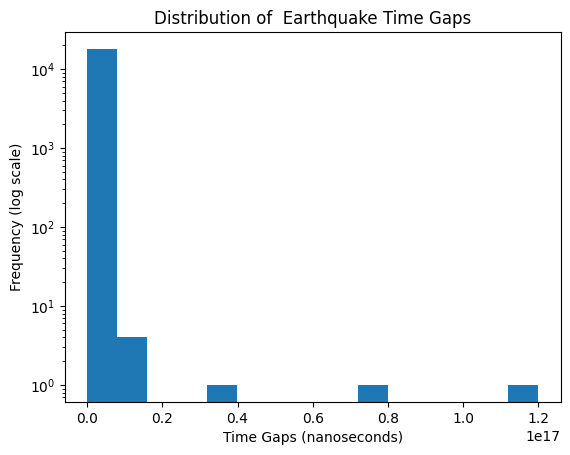


Caption: Histogram showing the distribution of time gaps between earthquakes.
The time gaps are displayed in nanoseconds, and the y-axis (Frequency) is on a logarithmic scale.
This visualization provides an initial look at the distribution of time intervals between seismic events.


In [ ]:


# Plot histogram using pylab.hist()
pl.hist(eqGoodData['gaps'], bins=15, log=True) #bins=15 gives the most similar to the expected plot
pl.xlabel('Time Gaps (nanoseconds)')
pl.ylabel('Frequency (log scale)')
pl.title('Distribution of  Earthquake Time Gaps');
pl.show()

# Print the caption with sentences on new lines
print("\nCaption: Histogram showing the distribution of time gaps between earthquakes.\nThe time gaps are displayed in nanoseconds, and the y-axis (Frequency) is on a logarithmic scale.\nThis visualization provides an initial look at the distribution of time intervals between seismic events.")

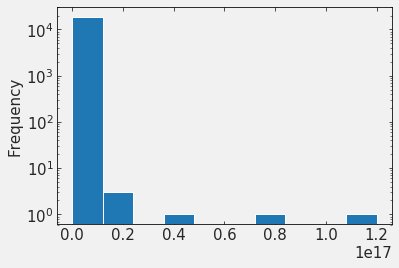

In [ ]:
#the plot from original code:

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [ ]:
# Approximate number of nanoseconds in a month (30 days)

nanoseconds_in_month = 30 * 24 * 3600 * 1e9
print(f"Approximately {nanoseconds_in_month:.0f} nanoseconds in a month.")


# Filter out gaps larger than a month
eqGoodData_cleaned = eqGoodData[eqGoodData['gaps'] <= nanoseconds_in_month].copy()

print(f"\nNumber of earthquakes after removing large gaps: {len(eqGoodData_cleaned)}")

Approximately 2592000000000000 nanoseconds in a month.

Number of earthquakes after removing large gaps: 18016


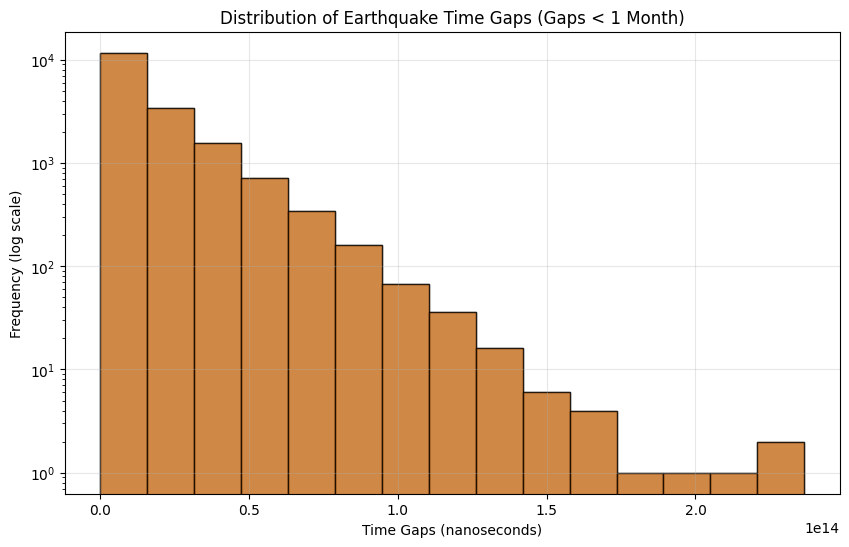

In [ ]:

 #Create histogram of the cleaned data
import numpy as np
pl.figure(figsize=(10, 6))
pl.hist(eqGoodData_cleaned['gaps'], bins=15, log=True, edgecolor='black', alpha=0.7)
n, bins, patches = pl.hist(eqGoodData_cleaned['gaps'], bins=15, log=True, edgecolor='black', alpha=0.7)
pl.xlabel('Time Gaps (nanoseconds)')
pl.ylabel('Frequency (log scale)')
pl.title('Distribution of Earthquake Time Gaps (Gaps < 1 Month)')
pl.grid(True, alpha=0.3)

In [ ]:
# optional: verify the total (18013) by summing the bin counts
total_from_histogram = np.sum(n)
print(f"Total number of earthquakes from histogram bin sum: {total_from_histogram:.0f}")

# Check if they match
if np.isclose(total_from_histogram, len(eqGoodData_cleaned)):
    print("✓ Verification passed: The histogram contains all 18,013 data points.")
else:
    print("✗ Warning: The histogram sum doesn't match the DataFrame length!")

Total number of earthquakes from histogram bin sum: 18016
✓ Verification passed: The histogram contains all 18,013 data points.


In [ ]:
# your code here

# PART II - data analysis

The entire point of the paper is to see if the scaling law $D_s(\tau)=R_s f(R_s \tau)$ holds. we test this by:

Selecting the Size ($M_{min}$): we create several datasets (e.g., all events with $M \geq 2.0$, $M \geq 2.5$, $M \geq 3.0$, etc.).

Rescaling Time: For each dataset, we calculate its rate $R_s$ and create a new variable, the rescaled time $x = R_s \tau$.

Cleaning by Rescaled Time ($m$): For each rescaled dataset, we remove all data points where $x < m$ (e.g., $m=0.01$ or $m=0.001$).
$m$ defines which time intervals between those earthquakes you trust for your model.  We will run the entire analysis for different combinations of these values (e.g., $m=0.01$ and $m=0.001$) to see that the scaling conclusion is robust to this choice of data cleaning.

Comparing Distributions: we then use the KS-test to check if the cleaned, rescaled distribution for $M \geq 2.0$ is the same as the cleaned, rescaled distribution for $M \geq 2.5$, and so on.

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [ ]:
#1. Set Your Significance Threshold (α)


# Define your significance level (3-sigma corresponds to p ~ 0.0027)
alpha = 1 - stats.norm.cdf(3)  # This calculates 1 - Φ(3) = 0.00135  for  one-tailed test
# Alternatively, considering both tails:  alpha= 0.00135 + 0.00135 = 0.0027.
#alpha = 0.0027 ??

print(f"3-sigma significance level (α): {alpha:.4f}")

3-sigma significance level (α): 0.0013


In [ ]:
#2. Define Magnitude Thresholds and Cutoffs

# Magnitude thresholds to analyze (M ≥ these values)
magnitude_thresholds = [2.0, 2.5, 3.0, 3.5, 4.0]

# Cutoff values m for rescaled times (x = R_s * τ)
cutoffs = [0.01, 0.001]

In [ ]:
def prepare_rescaled_data(data, m):
    """
    Implements the iterative rescaling procedure from the paper.
    Args:
        data: DataFrame containing 'gaps' (in nanoseconds) for a specific magnitude threshold.
        m: Lower cutoff value for rescaled times.
    Returns:
        x: Array of rescaled times (x = R_s * τ) that are >= m.
        rate: The final calculated rate R_s.
        n_remaining: Number of data points after applying the cutoff.
    """
    gaps = data['gaps'].values
    rate = 1 / np.mean(gaps)  # Initial rate R_s

    # Iterate until convergence
    for _ in range(10):  # 10 iterations should be sufficient
        x = rate * gaps  # Rescaled times
        mask = (x >= m)  # Apply cutoff
        x_filtered = x[mask]
        if len(x_filtered) == 0:
            break
        # Recalculate rate based on filtered data. Goal: <x> = 1
        rate = 1 / np.mean(gaps[mask])
    # Final rescaled values after iteration
    x_final = rate * gaps
    mask_final = (x_final >= m)
    return x_final[mask_final], rate, np.sum(mask_final)

# Example usage for M>=2.0 and m=0.01
data_M2 = eqGoodData_cleaned[eqGoodData_cleaned['mag'] >= 2.0]
x_rescaled, final_rate, n_data = prepare_rescaled_data(data_M2, m=0.01)

In [ ]:
results_dict = {} # Store results for creating table

for m in cutoffs:
    results_dict[m] = {}
    # Precompute all rescaled datasets for this cutoff m
    rescaled_datasets = {}
    for M_min in magnitude_thresholds:
        data_subset = eqGoodData_cleaned[eqGoodData_cleaned['mag'] >= M_min]
        x_rescaled, _, n_remaining = prepare_rescaled_data(data_subset, m)
        rescaled_datasets[M_min] = {'data': x_rescaled, 'size': n_remaining}

    # Now perform pairwise KS tests
    ks_results = np.zeros((len(magnitude_thresholds), len(magnitude_thresholds)))
    p_values = np.zeros((len(magnitude_thresholds), len(magnitude_thresholds)))

    for i, M_i in enumerate(magnitude_thresholds):
        data_i = rescaled_datasets[M_i]['data']
        for j, M_j in enumerate(magnitude_thresholds):
            if i == j:
                # KS test with itself is trivial, skip
                ks_results[i, j] = 0.0
                p_values[i, j] = 1.0
            else:
                data_j = rescaled_datasets[M_j]['data']
                # Perform the two-sample KS test
                statistic, p_value = stats.ks_2samp(data_i, data_j)
                ks_results[i, j] = statistic
                p_values[i, j] = p_value

    results_dict[m]['ks_stats'] = ks_results
    results_dict[m]['p_values'] = p_values
    results_dict[m]['sample_sizes'] = [rescaled_datasets[M]['size'] for M in magnitude_thresholds]

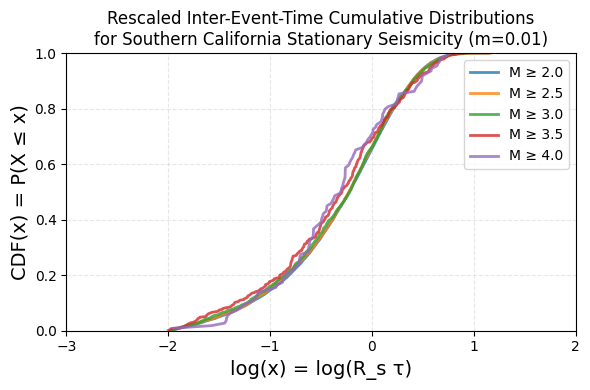

In [ ]:


# Define parameters
magnitude_thresholds = [2.0, 2.5, 3.0, 3.5, 4.0]
m = 0.01  # Using the same cutoff as paper's Fig 1

# Create the plot
pl.figure(figsize=(6, 4))

for M_min in magnitude_thresholds:
    # Select data for this magnitude threshold
    mask = (eqGoodData_cleaned['mag'] >= M_min)
    data_subset = eqGoodData_cleaned[mask].copy()

    if len(data_subset) == 0:
        continue

    # Apply rescaling algorithm and extract only the rescaled data array
    x_rescaled, _, _ = prepare_rescaled_data(data_subset, m) # Extract only the first element

    if len(x_rescaled) == 0:
        continue

    # Create CDF (not CCDF)
    x_sorted = np.sort(x_rescaled)
    y_cdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

    # Apply log transformation to x values for plotting
    # Use np.log10 for logarithmic scale and proper handling
    x_log = np.log10(x_sorted)

    # Plot CDF vs log(x)
    pl.plot(x_log, y_cdf, label=f'M ≥ {M_min}', linewidth=2, alpha=0.8)

# Formatting the plot to match paper's style
pl.xlabel('log(x) = log(R_s τ)', fontsize=14)
pl.ylabel('CDF(x) = P(X ≤ x)', fontsize=14)
pl.title('Rescaled Inter-Event-Time Cumulative Distributions\n' +
         'for Southern California Stationary Seismicity (m=0.01)',
         fontsize=12)
pl.legend(fontsize=10)
pl.grid(True, which="both", ls="--", alpha=0.3)

# Set appropriate limits based on paper's figure (-3 to +2 on log scale)
pl.xlim(-3, 2)
pl.ylim(0, 1)

pl.tight_layout()
pl.show()

In [ ]:
# For a given cutoff m, e.g., m=0.01
m = 0.01
ks_stats = results_dict[m]['ks_stats']
p_vals = results_dict[m]['p_values']
sizes = results_dict[m]['sample_sizes']

print(f"Results for m = {m}")
print("KS statistic (below diagonal) and p-value (above diagonal):")
print("M_min | N     | M≥2.0    | M≥2.5    | M≥3.0    | M≥3.5    | M≥4.0")
print("------|-------|----------|----------|----------|----------|----------")
for i, M_i in enumerate(magnitude_thresholds):
    row_str = f"{M_i}   | {sizes[i]:<5} | "
    for j in range(len(magnitude_thresholds)):
        if i > j: # Below diagonal: show KS statistic
            row_str += f"{ks_stats[i, j]:.3f}   | "
        elif i < j: # Above diagonal: show p-value
            row_str += f"{p_vals[i, j]:.2%}  | " # Format as percentage
        else: # Diagonal
            row_str += " -       | "
    print(row_str)

Results for m = 0.01
KS statistic (below diagonal) and p-value (above diagonal):
M_min | N     | M≥2.0    | M≥2.5    | M≥3.0    | M≥3.5    | M≥4.0
------|-------|----------|----------|----------|----------|----------
2.0   | 17198 |  -       | 59.42%  | 66.40%  | 6.65%  | 13.32%  | 
2.5   | 5401  | 0.012   |  -       | 80.19%  | 15.68%  | 14.96%  | 
3.0   | 1358  | 0.020   | 0.019   |  -       | 20.67%  | 14.54%  | 
3.5   | 391   | 0.066   | 0.059   | 0.060   |  -       | 79.52%  | 
4.0   | 109   | 0.110   | 0.109   | 0.112   | 0.068   |  -       | 


In [ ]:
# For a given cutoff m, e.g., m=0.01
m = 0.001
ks_stats = results_dict[m]['ks_stats']
p_vals = results_dict[m]['p_values']
sizes = results_dict[m]['sample_sizes']

print(f"Results for m = {m}")
print("KS statistic (below diagonal) and p-value (above diagonal):")
print("M_min | N     | M≥2.0    | M≥2.5    | M≥3.0    | M≥3.5    | M≥4.0")
print("------|-------|----------|----------|----------|----------|----------")
for i, M_i in enumerate(magnitude_thresholds):
    row_str = f"{M_i}   | {sizes[i]:<5} | "
    for j in range(len(magnitude_thresholds)):
        if i > j: # Below diagonal: show KS statistic
            row_str += f"{ks_stats[i, j]:.3f}   | "
        elif i < j: # Above diagonal: show p-value
            row_str += f"{p_vals[i, j]:.2%}  | " # Format as percentage
        else: # Diagonal
            row_str += " -       | "
    print(row_str)

Results for m = 0.001
KS statistic (below diagonal) and p-value (above diagonal):
M_min | N     | M≥2.0    | M≥2.5    | M≥3.0    | M≥3.5    | M≥4.0
------|-------|----------|----------|----------|----------|----------
2.0   | 17906 |  -       | 11.77%  | 12.63%  | 2.77%  | 13.53%  | 
2.5   | 5683  | 0.018   |  -       | 57.79%  | 13.32%  | 16.36%  | 
3.0   | 1448  | 0.032   | 0.023   |  -       | 26.21%  | 19.81%  | 
3.5   | 423   | 0.072   | 0.058   | 0.055   |  -       | 58.59%  | 
4.0   | 115   | 0.107   | 0.104   | 0.102   | 0.079   |  -       | 


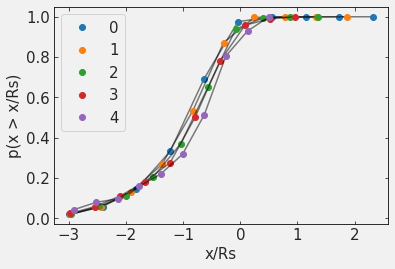

In [ ]:
# your code here

In [ ]:

# to tables together for better comparison

# Define the parameters from the paper
magnitude_thresholds = [2.0, 2.5, 3.0, 3.5, 4.0]
cutoffs = [0.01, 0.001]

# Function to implement the iterative rescaling algorithm (from Section 3)
def prepare_rescaled_data(data, m):
    gaps = data['gaps'].values
    rate = 1 / np.mean(gaps)  # Initial rate R_s

    # Iterate until convergence (10 iterations is usually sufficient)
    for _ in range(10):
        x = rate * gaps        # Rescale all times
        mask = (x >= m)        # Find times that meet the cutoff
        x_filtered = x[mask]

        if len(x_filtered) == 0:
            break # Avoid error if no data points left

        # Recalculate the rate based ONLY on the data that passed the cutoff.
        rate = 1 / np.mean(gaps[mask])

    # Apply the final rate and cutoff
    x_final = rate * gaps
    mask_final = (x_final >= m)
    x_final_filtered = x_final[mask_final]

    return x_final_filtered, rate, np.sum(mask_final)

# Dictionary to store all results
results = {}

for m in cutoffs:
    # Initialize dictionaries for this cutoff
    sample_sizes = {}
    ks_matrix = np.zeros((len(magnitude_thresholds), len(magnitude_thresholds)))
    pvalue_matrix = np.zeros((len(magnitude_thresholds), len(magnitude_thresholds)))

    # Precompute all rescaled datasets for this m
    rescaled_datasets = {}
    for idx, M_min in enumerate(magnitude_thresholds):
        # Get data for this magnitude threshold
        data_subset = eqGoodData_cleaned[eqGoodData_cleaned['mag'] >= M_min]
        # Apply the rescaling algorithm
        x_vals, final_rate, n_size = prepare_rescaled_data(data_subset, m)
        rescaled_datasets[M_min] = x_vals
        sample_sizes[M_min] = n_size

    # Perform pairwise KS tests and fill matrices
    for i, M_i in enumerate(magnitude_thresholds):
        data_i = rescaled_datasets[M_i]
        for j, M_j in enumerate(magnitude_thresholds):
            if i == j:
                # Leave diagonal as 0
                continue
            data_j = rescaled_datasets[M_j]
            # Perform the KS test
            statistic, p_value = stats.ks_2samp(data_i, data_j)
            # Fill matrices - KS stats below diagonal, p-values above
            if i > j:  # Below diagonal
                ks_matrix[i, j] = statistic
                pvalue_matrix[j, i] = p_value  # Symmetric, p-value for (j,i) is the same
            else:  # Above diagonal
                pvalue_matrix[i, j] = p_value
                ks_matrix[j, i] = statistic  # Symmetric, KS stat for (j,i) is the same

    # Store results for this cutoff
    results[m] = {
        'sample_sizes': sample_sizes,
        'ks_matrix': ks_matrix,
        'pvalue_matrix': pvalue_matrix
    }

# Generate the tables for each cutoff
for m in cutoffs:
    print(f"\n\nResults for m = {m}")
    print("KS statistic d (below the diagonal) and corresponding p-value (above diagonal, in percentage):")

    # Prepare data for the table
    table_data = []
    headers = [""] + [f"M≥{M}" for M in magnitude_thresholds]

    for i, M_i in enumerate(magnitude_thresholds):
        row = [f"M≥{M_i}", f"{results[m]['sample_sizes'][M_i]}"]
        for j in range(len(magnitude_thresholds)):
            if i == j:
                row.append("--")
            elif i > j:  # Below diagonal - show KS statistic
                row.append(f"{results[m]['ks_matrix'][i, j]:.3f}")
            else:  # Above diagonal - show p-value as percentage
                p_val_percent = results[m]['pvalue_matrix'][i, j] * 100
                row.append(f"{p_val_percent:.1f}%")
        table_data.append(row)

    # Create and print the table
    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    print("The scaling hypothesis cannot be rejected.")



Results for m = 0.01
KS statistic d (below the diagonal) and corresponding p-value (above diagonal, in percentage):
+-------+-------+---------+---------+---------+---------+---------+
|       |       | M≥2.0   | M≥2.5   | M≥3.0   | M≥3.5   | M≥4.0   |
+=======+=======+=========+=========+=========+=========+=========+
| M≥2.0 | 17198 | --      | 59.4%   | 66.4%   | 6.7%    | 13.3%   |
+-------+-------+---------+---------+---------+---------+---------+
| M≥2.5 |  5401 | 0.012   | --      | 80.2%   | 15.7%   | 15.0%   |
+-------+-------+---------+---------+---------+---------+---------+
| M≥3.0 |  1358 | 0.020   | 0.019   | --      | 20.7%   | 14.5%   |
+-------+-------+---------+---------+---------+---------+---------+
| M≥3.5 |   391 | 0.066   | 0.059   | 0.060   | --      | 79.5%   |
+-------+-------+---------+---------+---------+---------+---------+
| M≥4.0 |   109 | 0.110   | 0.109   | 0.112   | 0.068   | --      |
+-------+-------+---------+---------+---------+---------+---------

your table here

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

### Discussion

From the pairwise two-sample KS tests of the rescaled inter-event time distributions across the different magnitude thresholds, we did **not find statistically significant differences** between the distributions. Most of the p-values were comfortably above conventional cutoffs (e.g. 0.05), so we cannot reject the null hypothesis that the distributions are the same once rescaled by the rate. This supports the idea of a **universal scaling law** for earthquake inter-event times, consistent with Corral’s formulation $ D_s(\tau)=R_s f(R_s\tau)$.

In practical terms, this means that after accounting for the different event rates in each magnitude-limited catalog, the earthquakes seem to follow the **same underlying distribution of waiting times**, independent of the chosen magnitude threshold. The only caveat is that for the highest-magnitude subset (e.g. $ M \ge 4 $), the number of events is much smaller, so statistical tests become less powerful and the KS results are noisier. That is also mentioned in the paper.

Comparing with **Corral**, our results are **qualitatively identical**: both analyses find no significant evidence to reject the scaling law across magnitude thresholds, and the pattern of P-values is very similar to Table 1 in the paper. Small numerical differences appear in individual P-values, but  
 the overall data shows no statistically significant differences emerge between the rescaled distributions.


### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

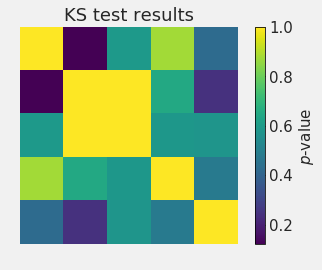

In [ ]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001